In [1]:
#importando as bibliotecas necessárias
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#carregando a base de dados com as categorias geradas pelo modelo gpt3.5-turbo
path = "./data/gpt35turbo_generated_issues.csv"
data = pd.read_csv(path)
data.head(3)

,name,review,rating,language,sentiment,issue
0,Michael Capela,"Não recomendo o C6 Bank para ninguém, simplesm...",1.0,pt,NEGATIVE,Customer Support
1,Edson Pereira,Tenho conta ha tempos. Boa movimentação no car...,2.0,pt,NEGATIVE,Credit Refusal
2,JOÃO BAND,"pior empresa pra se ter conta, meu deus... blo...",1.0,pt,NEGATIVE,Customer Support


In [3]:
#checando as categorias geradas pelo modelo gpt 3.5 turbo
issues = list(data["issue"].unique())
issues

['Customer Support',
 'Credit Refusal',
 'User Experience',
 'Category: User Experience',
 'Improper Billing',
 'Category: Customer Support',
 'Category: Credit Refusal',
 'Fraud',
 'Credit Refusal.',
 'Customer Support.',
 'Category: Improper Billing',
 'User Experience.',
 'Fraud.',
 'The review falls under the',
 'Category: Fraud',
 'Improper Billing and User',
 "['Fraud']",
 'The review falls into the',
 'I would categorize this',
 "['Customer Support']",
 'Category: Customer Support.',
 'The review can be categorized',
 "['Credit Refusal']",
 'Category: User Experience.',
 'Improper Billing.',
 "Category: 'Fraud",
 'This review can be categorized']

Como podemos ver, o chat gerou outputs diferentes para categorias que se referem ao mesmo tipo de problema, portanto, devemos fazer alguns ajustes

In [3]:
#definindo um dicionário para renomear as categorias
rename_dict = {'Category: User Experience': 'User Experience',
              'Category: Customer Support': 'Customer Support',
              'Category: Credit Refusal': 'Credit Refusal',
               'Category: Customer Support.': 'Customer Support',
              'Credit Refusal.': 'Credit Refusal',
              'Customer Support.': 'Customer Support',
              'Category: Improper Billing': 'Improper Billing',
              'User Experience.': 'User Experience',
              'Fraud.': 'Fraud',
              'Category: Fraud': 'Fraud',
              "['Fraud']": 'Fraud',
              "['Customer Support']": 'Customer Support',
              "['Credit Refusal']": 'Credit Refusal',
              'Category: User Experience.': 'User Experience',
              'Improper Billing.': 'Improper Billing',
              "Category: 'Fraud": 'Fraud',
              }

#aplicando a substituição
data["issue"] = data["issue"].replace(rename_dict)

In [ ]:
#agrupando as categorias por contagem de cada uma delas
df_issues = pd.DataFrame(data.groupby(["issue"])["issue"].count().rename("total_reviews"))
df_issues = df_issues.reset_index()
df_issues = df_issues.sort_values(by="total_reviews", ascending=False)
df_issues.head(3)

In [7]:
#vamos filtrar apenas as categorias que foram definidas previamente e que fazem sentido à análise
df_issues = df_issues[df_issues["total_reviews"] >= 51]

Text(0.5, 1.0, 'Contagem de reviews por categoria')

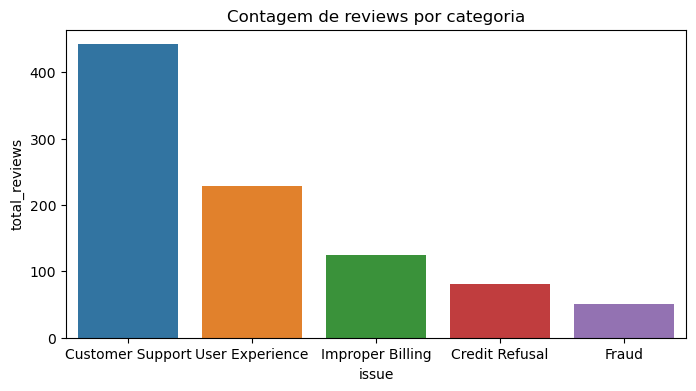

In [10]:
#visualizando a contagem de reviews por categoria
plt.figure(figsize=(8, 4))
sns.barplot(data=df_issues, x="issue", y="total_reviews")
plt.title("Contagem de reviews por categoria")

### Visualizando reviews - Customer Support

In [4]:
df_support = data[data["issue"] == "Customer Support"]
df_support = df_support.reset_index(drop=True)
df_support.head(3)

,name,review,rating,language,sentiment,issue
0,Michael Capela,"Não recomendo o C6 Bank para ninguém, simplesm...",1.0,pt,NEGATIVE,Customer Support
1,JOÃO BAND,"pior empresa pra se ter conta, meu deus... blo...",1.0,pt,NEGATIVE,Customer Support
2,Roger Meyer,O pior banco que existe para criar relacioname...,1.0,pt,NEGATIVE,Customer Support


In [8]:
#visualizando aleatoriamente alguns reviews
r1 = df_support["review"][15]
r2 = df_support["review"][114]
r3 = df_support["review"][323]

print(f"Review 1: {r1}")
print(f"Review 2: {r2}")
print(f"Review 3: {r3}")

Review 1: O atendimento é via Boot e eles não dão atenção nenhuma para a solicitação dos clientes. Quando tenta fazer estorno o processo é lento e quase não acontece. Corram para a Nubank, lá a anuidade também é gratuita e pelo menos que atende a gente é pelo menos uma pessoa!
Pior experiência dentre todos os bancos que já tive!
Review 2: Atendimento horrível. Você perde a paciência em tentar falar no chat, quando enfim consegue você fala sobre A e eles entendem e respondem sobre B, NÃO RECOMENDO A NINGUÉM esse cartão, se você quiser ter raiva, use esse cartão.
Review 3: Só tenho um conselho pra quem ainda não se tornou cliente: Fuja!!!!! É cilada bino! Empresa não tem suporte algum. Não deveria estar em funcionamento.


### Visualizando reviews - Improper Billing

In [9]:
df_support = data[data["issue"] == "Improper Billing"]
df_support = df_support.reset_index(drop=True)
df_support.shape

(124, 6)

In [10]:
#visualizando aleatoriamente alguns reviews
r1 = df_support["review"][80]
r2 = df_support["review"][92]
r3 = df_support["review"][29]

print(f"Review 1: {r1}")
print(f"Review 2: {r2}")
print(f"Review 3: {r3}")

Review 1: C6 me deixou muito chateado retiram meu limite e sempre paguei direito e me roubaram também por me cobraram manutenção da conta
Review 2: Estou desesperada pq Paguei minha fatura de 423.00 reais fui olhar o saldo tá constando que eu continuo devendo os 423.00 sendo que já foi pago mais não vou deixar barato vou correr ao cidade alerta e ao Celso Russomanno para divulgar por isto não e justo isto e um assalto muita covardia fazer isto com um ser humano, detalhes não paguei mínimo de forma alguma simplesmente tão tentando me roubar na maior cara lisa por favor não contrate o cartão de crédito deles.

Eu entrei em contato mais eles não atendem só falam isto pra pessoa verem que eles resolvem mais e mentira mais de meia hora esperando na ligação e ninguém atende o valor que paguei continua pendente sendo que já foi pago.
Review 3: Banco péssimo!!!
Não recomendo, sempre paguei minhas faturas em dia e simplesmente zeraram meu limite assim que paguei a última fatura.
Será que estão 

### Visualizando reviews - User Experience

In [11]:
df_support = data[data["issue"] == "User Experience"]
df_support = df_support.reset_index(drop=True)
df_support.shape

(228, 6)

In [12]:
#visualizando aleatoriamente alguns reviews
r1 = df_support["review"][14]
r2 = df_support["review"][112]
r3 = df_support["review"][83]

print(f"Review 1: {r1}")
print(f"Review 2: {r2}")
print(f"Review 3: {r3}")

Review 1: Banco péssimo. O Nubank tem a opção de adiantar parcelas no próprio app. Fora que te dão desconto quando antecipam. Aqui vc tem que solicitar no chat e eles demoram muito pra trazer a parcela pra fatura atual. Fora que no Nubank vc consegue juntar faturas e pagar tudo, aqui não dá pra juntar. Você “adianta” só a que está em aberto. Eu quero quitar o cartão que vai até novembro e não consigo. Assim que acabar vou cancelar. Péssimo.
Review 2: Sou cliente antigo e ja levei mais de 40 pessoas , porem na ultima semana , estou com meus valores bloqueados por problemas no APP. Cuidado
Review 3: Deus me livre desse banco, atendimento péssimo, ou melhor, inexistente... Prefiro agr guardar meu dinheiro num envelope de baixo do tapete do que usar isso.


### Avliação da classificação do modelo

Observando os reviews que acabamos de printar acima, o gpt-3.5-turbo parece ter feito uma classificação razoável de cada review para as categorias que solicitamos. Dessa forma, vamos continuar nossa análise dos resultados gerados pelo modelo.

### Analisando os resultados

Em termos de volume de reclamações, o suporte ao cliente certamente é um problema a ser atacado. Porém, como cobrança indevida também é uma situação que gera uma experiência bem desgastante na perspectiva do cliente, vamos usá-la também para construir esboços de possíveis abordagens para amenizar essas situações.

Já que conseguimos identificar os pontos de melhoria, agora podemos traçar oportunidades de desenvolvimento e possíveis soluções para cada uma das frentes. Para isso vamos utilizar um framework chamado "Opportunity Solution Tree". Nele, definimos qual é o nosso objetivo a ser alcançado, mapeamos quais contextos podemos atacar, criamos um espaço de soluções possíveis para alcançar o objetivo definido e os respectivos experimentos para avaliar nossas hipóteses. Para cada uma das frentes que escolhemos, temos as seguintes árvores:

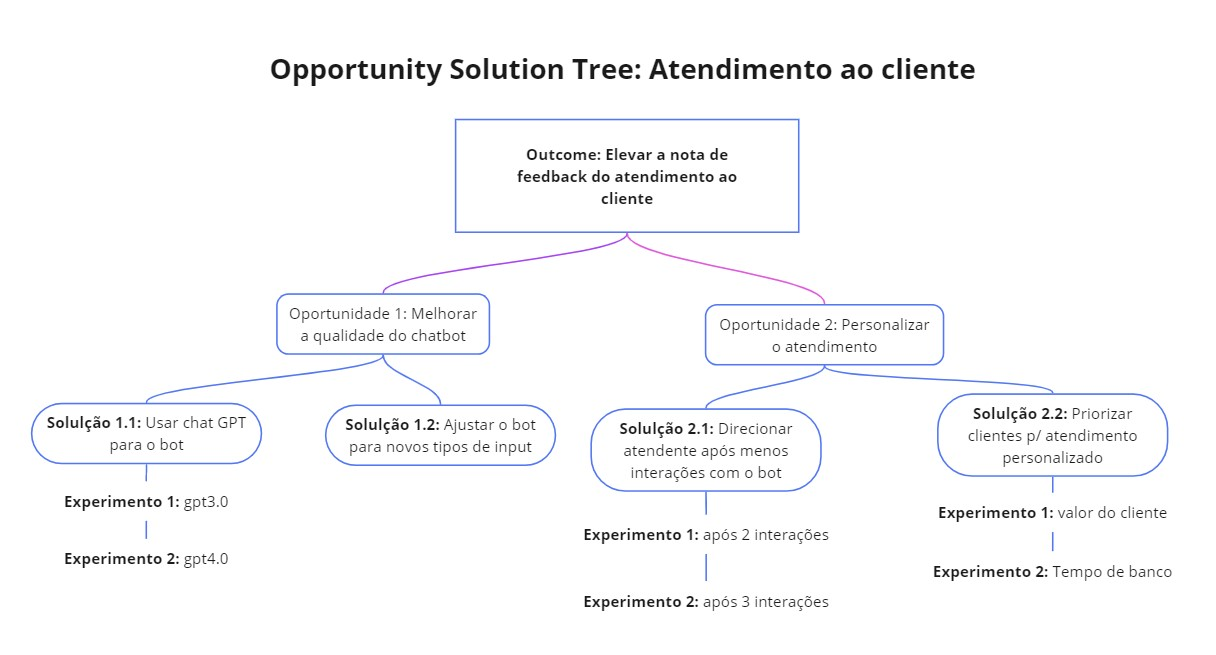

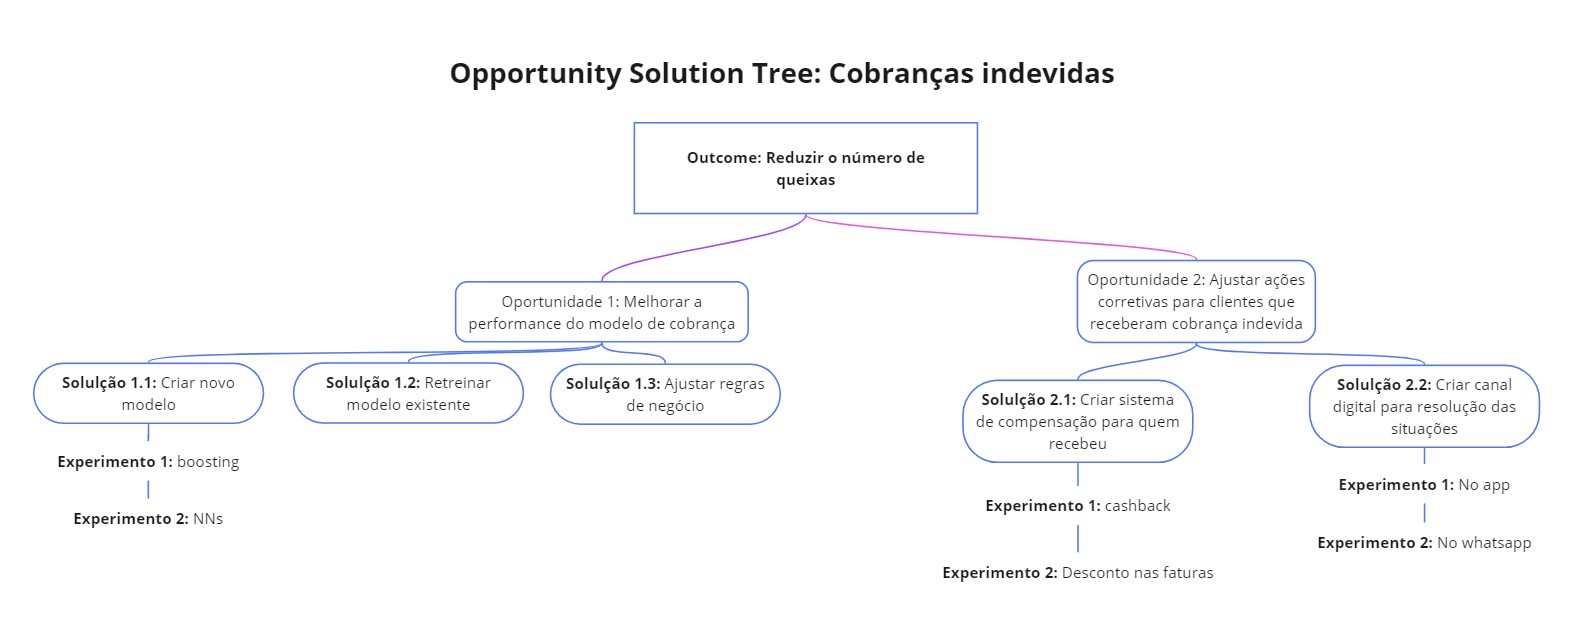